## Demos Weeks 1 and 2


In this demo, we will study multivariate regression as well as well as regularization. We will also study how linear regression can be used to learn a model on data that exhibit a non linear relationship between the features x_i and the targets t_i and we will take this example to illustrate the flexibility of the combination of linear prediction and high dimension for learning

### Part I Multivariate regression

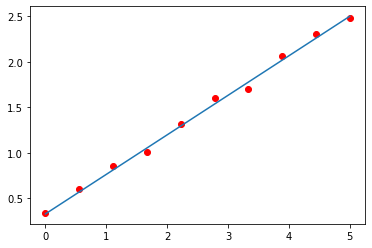

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,5,10)

# Before considering more complex data, we get back to the linearly generated targets. 
# In practice, we will not want to re-code the gradient descent each time. We will instead 
# rely on the scikit learn library which offers a number of built in implementations. 


xtilde = np.hstack((np.ones((len(x),1)), x.reshape(-1,1)))

beta = np.random.normal(0,1,(2,1))


# [beta0 beta1] * [1, xtilde] = beta0 + beta1 xtilde_1

targets = np.dot(beta.T, xtilde.T)

targets_noisy = targets + np.random.normal(0,.05,len(x))


plt.plot(x.reshape(-1,1), targets.T)
plt.scatter(x.reshape(-1,1), targets_noisy.T, c= 'r')
plt.show()




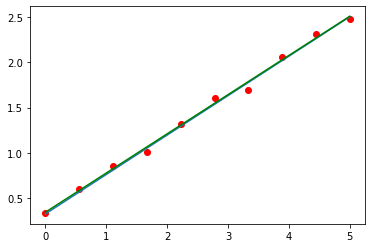

In [23]:
# One of the simplest model in scikit learn is the LinearRegression model 
# which can be imported through the lines below

from sklearn.linear_model import LinearRegression

# Most of the model in scikit learn requires an initialization 

myRegression = LinearRegression()


# the model then come with two functions: (1) A 'fit' function which learns the 
# model on some dataset (the equivalent to performing the gradient updates)
myRegression.fit(x.reshape(-1,1), targets_noisy.T)

xtest = np.linspace(0,5,40)

# and (2) a 'predict' function, which, once the model has been learned, can be 
# used apply the model on new data 
prediction = myRegression.predict(xtest.reshape(-1,1))


# we can then compare the true model with the model learned as before 
plt.plot(x.reshape(-1,1), targets.T)
plt.plot(xtest, prediction, c='g')
plt.scatter(x.reshape(-1,1), targets_noisy.T, c= 'r')
plt.show()

In [26]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5,10)

xtilde = np.hstack((np.ones((len(x),1)), x.reshape(-1,1)))

xtilde = np.hstack((xtilde, (x.reshape(-1,1))**2))
print(xtilde)

# beta0 + beta1 x --> beta0 + beta1 x + beta2 x^2 --> (beta0, beta1, beta2)

[[ 1.         -5.         25.        ]
 [ 1.         -3.88888889 15.12345679]
 [ 1.         -2.77777778  7.71604938]
 [ 1.         -1.66666667  2.77777778]
 [ 1.         -0.55555556  0.30864198]
 [ 1.          0.55555556  0.30864198]
 [ 1.          1.66666667  2.77777778]
 [ 1.          2.77777778  7.71604938]
 [ 1.          3.88888889 15.12345679]
 [ 1.          5.         25.        ]]


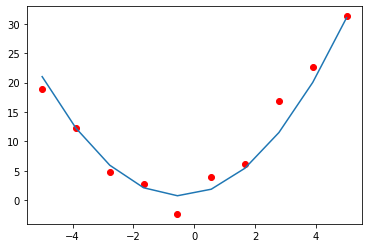

In [32]:
# Now that we familiarized ourselves with the LinearRegression model from scikit, 
# we will study how it can be combined with a higher dimensional space to learn non 
# linear mapping of any kind. 

# we now consider a simple non linear relation betweem the x_i and the t_i 
# (so that it cannot be captured by the line anymore) of the form 
# t_i = beta0 + beta1*x_i + beta2*x_i^2

beta = np.asarray([1,1,1])

targets = np.dot(beta.T, xtilde.T)

# To which we add some noise as before 

targets_noisy = targets + np.random.normal(0,2,len(x))

plt.plot(x.reshape(-1,1), targets.T)
plt.scatter(x.reshape(-1,1), targets_noisy.T, c= 'r')
plt.show()



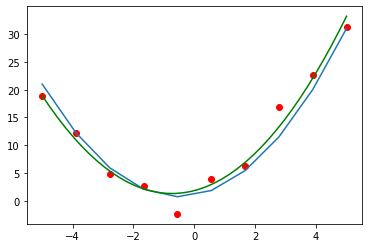

In [44]:
# clearly, one cannot fit a line to this dataset without making a very rough and 
# dangerous approximation. However we can view the x_i^2 as an additional feature, 
# let us call it 'y' of our model. so that t_i = beta0 + beta1*x_i + beta2*y_i
# viewed like this, we still have a linear model which we can try to learn through 
# linear regression. 


from sklearn.linear_model import LinearRegression

myRegressionModel2 = LinearRegression()


# we can then fit our linear model not to (x_i, t_i) anymore but to the features 
# data (t_i, x_i, x_i^2), viewing x_i^2 as a new feature.


# Using the LinearRegression() from scikit learn will thus return a set of coefficients 
# beta0, beta1 and beta2 such that beta0 + beta1*x_i +beta2 x_i^2 well approximates t_i 
# in the OLS sense. And the result is a plane in the 3D space. 


myRegressionModel2.fit(xtilde, targets_noisy.T)



# We can then use that plane to predict new targets from (x_i, y_i) pairs. 
# Of course for us, this only make sense if we take points (x_i, y_i) of the form (x_i, x_i^2)
# For any new point x_i we can thus generate x_i^2 then use our plane to predict t_i. 
# This makes because we know that such a plane exists as t_i = beta0 + beta1*x_i + beta2*x_i^2


# applying this idea to get prediction on the whole [-5, 5] interval can be 
# used to illustrate our learned model on top of the true unknown one

xtest = np.linspace(-5,5,40)

phiTest = np.hstack((np.ones((len(xtest),1)),xtest.reshape(-1,1)))
phiTest = np.hstack((phiTest, (xtest.reshape(-1,1))**2))                   
np.shape(phiTest)



prediction = myRegressionModel2.predict(phiTest)


plt.plot(x, targets)
plt.plot(xtest, prediction, c='g')
plt.scatter(x, targets_noisy, c= 'r')
plt.show()




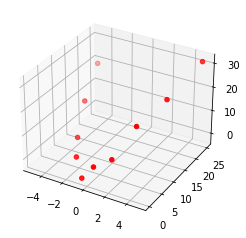

In [48]:

# we can also represent the plane that is learned in the 3D space using the 
# meshgrid function. Meshgrid can be used to generate the coordinates of all 
# the points on a grid from the x and y coordinates of the sides. We can then 
# apply our linear model to those points to diplay the plane 


from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xtilde[:,1], xtilde[:,2], targets_noisy, c='r')
plt.show()

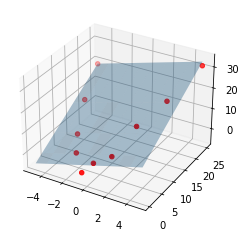

In [64]:

#xx, yy = np.meshgrid(xtilde[:,1],xtilde[:,2])

xx, yy = np.meshgrid(xtilde[:,1], xtilde[:,2])

xxF = xx.flatten()
yyF = yy.flatten()

Xgridtilde = np.hstack((xxF.reshape(-1,1), yyF.reshape(-1,1)))
Xgridtilde = np.hstack((np.ones((len(xx.flatten()),1)), Xgridtilde))


predictedTargetsGrid = myRegressionModel2.predict(Xgridtilde)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xtilde[:,1], xtilde[:,2], targets_noisy, c='r')
ax.plot_surface(xx, yy, np.reshape(predictedTargetsGrid, np.shape(xx)), alpha = 0.2)
plt.show()

### Part II: Overfitting and Ridge regularization 

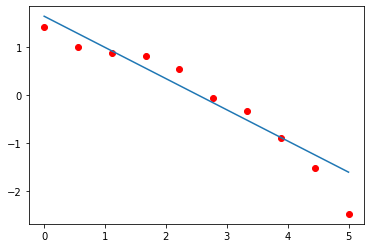

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# we have seen that every type of relation can be captured by the combination of a 
# linear model and a sufficiently high dimensional space. But is it always a good 
# idea to go to high dimension?

# To study this, we can get back to the linear relation between the x_i and t_i and 
# try to learn some overcomplicated model for that data. For example by generating a 
# lot of polynomial features. Not just x_i^2 but x_i^2, x_I^3, x_i^4, ... x_i^d. 
# This can be done through another function of scikit learn: the function 'PolynomialFeatures'


x = np.linspace(0,5, 10)

xtilde = np.hstack((np.ones((len(x),1)), x.reshape(-1,1)))   # 

beta = np.random.normal(0,1, 2)

noise = np.random.normal(0,0.3,len(x))


targets_noiseless = np.dot(beta, xtilde.T)
targets_noisy = np.dot(beta, xtilde.T) + noise


plt.plot(x, targets_noiseless)
plt.scatter(x, targets_noisy, c='r')
plt.show()




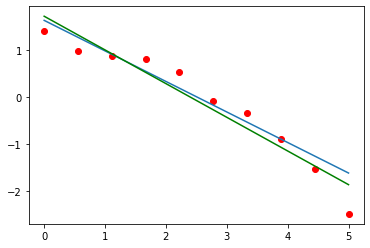

In [2]:
from sklearn import linear_model

# we start with a model of degree one

myregressionModel = linear_model.LinearRegression()
myregressionModel.fit(x.reshape(-1,1), targets_noisy)


xTest = np.linspace(0,5,100)

prediction = myregressionModel.predict(xTest.reshape(-1,1))

plt.plot(x, targets_noiseless)
plt.scatter(x, targets_noisy, c='r')
plt.plot(xTest,prediction, c='g')
plt.show()





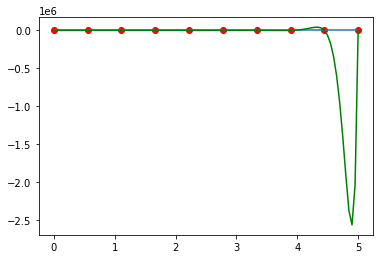

In [3]:
# We then generate many more polynomial features with scikit learn 
# (try displaying the array higherdegree_x)
# and we fit our model to the vector (x_i, x_i^2, x_i^3, ... x_i^d)

from sklearn.preprocessing import PolynomialFeatures

polynomialFeaturesGenerator = PolynomialFeatures(30)
higherdegree_x = polynomialFeaturesGenerator.fit_transform(x.reshape(-1,1))

myregressionModel = linear_model.LinearRegression()
myregressionModel.fit(higherdegree_x, targets_noisy)

xTest = np.linspace(0,5,100)

higherdegree_xTest = polynomialFeaturesGenerator.fit_transform(xTest.reshape(-1,1))

prediction_xTest = myregressionModel.predict(higherdegree_xTest)

plt.plot(higherdegree_x[:,1], targets_noiseless)
plt.scatter(higherdegree_x[:,1], targets_noisy, c='r')
plt.plot(higherdegree_xTest[:,1],prediction_xTest, c='g')
plt.show()





You can see from the above that an overly complicated model will perfectly fit the points from the training set (in red) but will poorly approximate the true (in blue) line. This is because we have added noise to sample data from the blue line and a complex model will fit the noise perfectly, while what we really want is a model that neglect the noise as much as possible. To somehow resolve this, we can try to penalyze the coefficients beta, hoping to set the less maningful ones (those associated to powers greater than 1 in this case) to 0. One approach is to extend the loss from the original OLS loss to

\begin{align}
\ell_{\text{RIDGE}}(\beta) = \frac{1}{2N}\sum_{i=1}^N (t^{(i)} - (\beta^T \phi(\boldsymbol x^{(i)})))^2 + \alpha \sum_{j=1}^{D} |\beta_j|^2
\end{align}

where $\boldsymbol{\beta} = (\beta_0, \beta_1, \ldots, \beta_D)$ is our vector of weights and $\phi(\boldsymbol{x}^{(i)}) = (1, x^{(i)}, (x^{(i)})^2, \ldots, x^{(D)})$ is our new feature vector. $\alpha$ determines by how much we want to steer the weight to 0. Larger values of $\alpha$ will penalize non zero weights more while smaller values will penalize the fitting term more. 

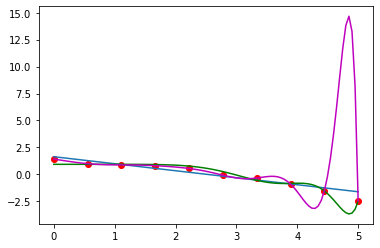

In [4]:
from sklearn.preprocessing import PolynomialFeatures

# The two models are compared below. We start with the simple OLS loss on the many 
# polynomial features

polynomialFeaturesGenerator = PolynomialFeatures(14)
higherdegree_x = polynomialFeaturesGenerator.fit_transform(x.reshape(-1,1))

myregressionModel = linear_model.LinearRegression()
myregressionModel.fit(higherdegree_x, targets_noisy)

xTest = np.linspace(0,5,100)

higherdegree_xTest = polynomialFeaturesGenerator.fit_transform(xTest.reshape(-1,1))

prediction_xTest_lin = myregressionModel.predict(higherdegree_xTest)


from sklearn.linear_model import Ridge

polynomialFeaturesGenerator = PolynomialFeatures(14)
higherdegree_x = polynomialFeaturesGenerator.fit_transform(x.reshape(-1,1))


# The model corresponding to the Ridge loss 
# can be learned in scikit learn through the function with a single parameter ('alpha') 


myRidgeModel = linear_model.Ridge(alpha = 1e6)
myRidgeModel.fit(higherdegree_x, targets_noisy)

xTest = np.linspace(0,5,100)

higherdegree_xTest = polynomialFeaturesGenerator.fit_transform(xTest.reshape(-1,1))

prediction_xTest = myRidgeModel.predict(higherdegree_xTest)

plt.plot(higherdegree_x[:,1], targets_noiseless)
plt.scatter(higherdegree_x[:,1], targets_noisy, c='r')
plt.plot(higherdegree_xTest[:,1],prediction_xTest, c='g')
plt.plot(higherdegree_xTest[:,1], prediction_xTest_lin, c = 'm')
plt.show()


